## 作业
### 1. 查阅matplotlib官网，列举出Sequential，Diverging，Cyclic，Qualitative，Miscellaneous分别有哪些内置的colormap，并以代码绘图的形式展现出来
| Perceptually Uniform Sequential | Sequential | Sequential (2) | Diverging | Cyclic           | Qualitative | Miscellaneous |
|---------------------------------|------------|----------------|-----------|------------------|-------------|---------------|
| viridis                         | Greys      | binary         | PiYG      | twilight         | Pastel1     | flag          |
| plasma                          | Purples    | gist_yarg      | PRGn      | twilight_shifted | Pastel2     | prism         |
| inferno                         | Blues      | gist_gray      | BrBG      | hsv              | Paired      | ocean         |
| magma                           | Greens     | gray           | PuOr      |                  | Accent      | gist_earth    |
| cividis                         | Oranges    | bone           | RdGy      |                  | Dark2       | terrain       |
|                                 | Reds       | pink           | RdBu      |                  | Set1        | gist_stren    |
|                                 | YlOrBr     | spring         | RdYlBu    |                  | Set2        | gnuplot       |
|                                 | YlOrRd     | summer         | RdYlGn    |                  | Set3        | gnuplot2      |
|                                 | OrRd       | autumn         | Spectral  |                  | tab10       | CMRmap        |
|                                 | PuRd       | winter         | coolwarm  |                  | tab20       | cubehelix     |
|                                 | RdPu       | cool           | bwr       |                  | tab20b      | brg           |
|                                 | BuPu       | Wistia         | seismic   |                  | tab20c      | gist_rainbow  |
|                                 | GnBu       | hot            |           |                  |             | rainbow       |
|                                 | PuBu       | afmhot         |           |                  |             | jet           |
|                                 | YlGnBu     | gist_heat      |           |                  |             | nipy_spectral |
|                                 | PuBuGn     | copper         |           |                  |             | gist_ncar     |
|                                 | BuGn       |                |           |                  |             |               |
|                                 | YlGn       |                |           |                  |             |               |



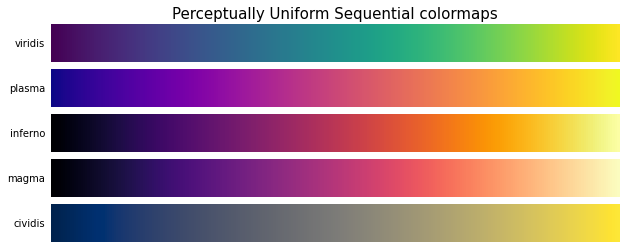

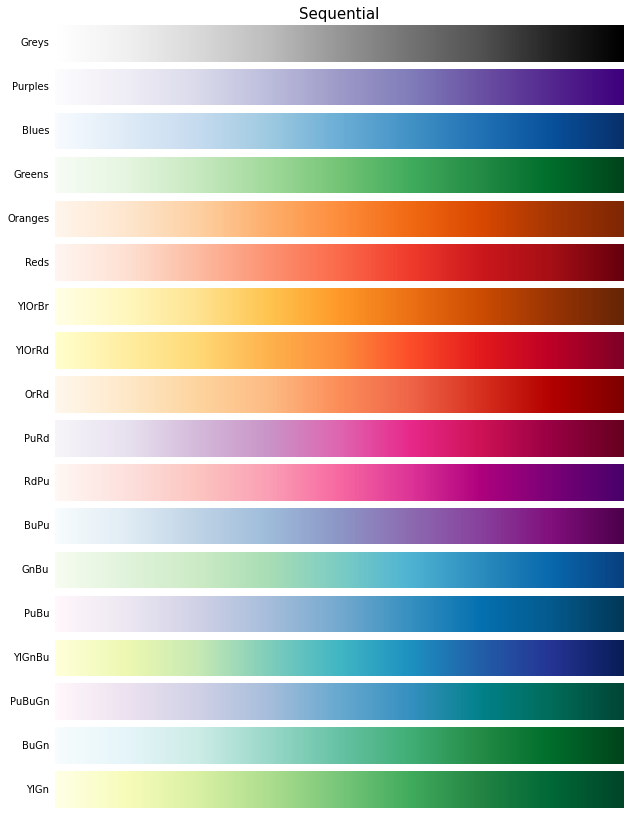

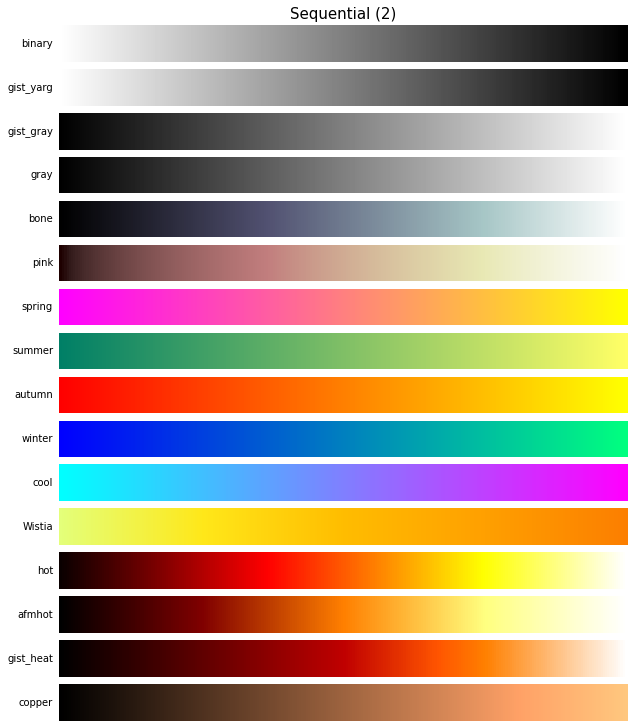

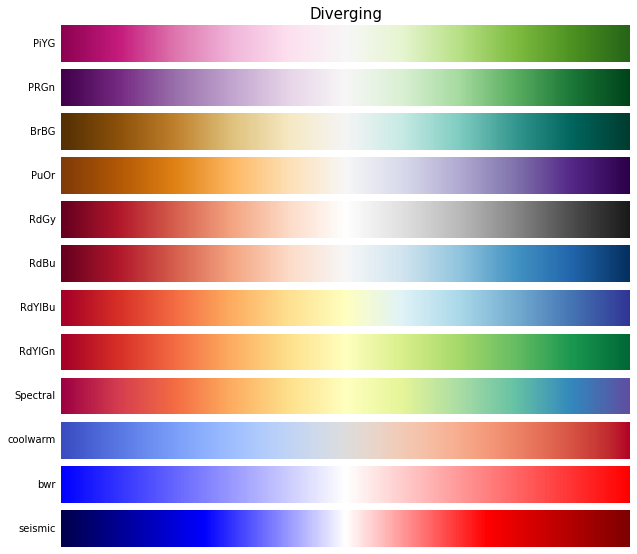

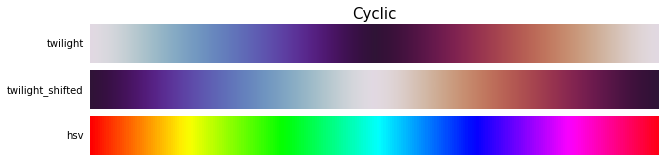

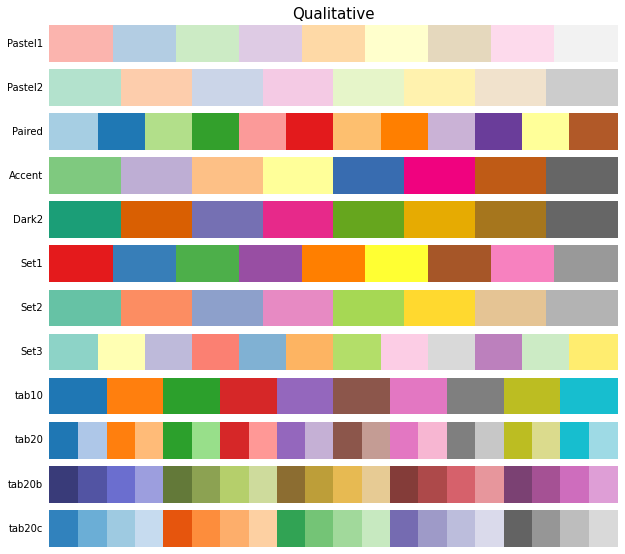

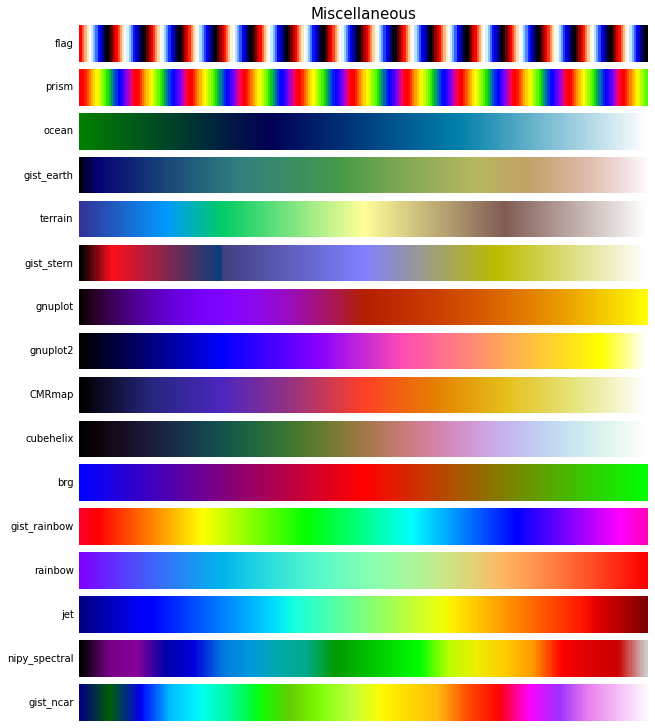

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

cmaps = [('Perceptually Uniform Sequential colormaps', [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']),
         ('Sequential', [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']),
         ('Sequential (2)', [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']),
         ('Diverging', [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']),
         ('Cyclic', ['twilight', 'twilight_shifted', 'hsv']),
         ('Qualitative', [
            'Pastel1', 'Pastel2', 'Paired', 'Accent',
            'Dark2', 'Set1', 'Set2', 'Set3',
            'tab10', 'tab20', 'tab20b', 'tab20c']),
         ('Miscellaneous', [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral', 'gist_ncar'])]

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient)) # Stack arrays in sequence vertically (row wise).
# print(gradient, gradient)

def plot_build_in_colormap(cmap_category, cmap_list):
  # Adjust figure height(h) to number of color maps
  nrows = len(cmap_list)

  h = 0.8
  fig, axes = plt.subplots(nrows = nrows, figsize = (10,nrows * h))
  fig.subplots_adjust(left = 0.2, right = 0.99)
  axes[0].set_title(cmap_category, fontsize = 15)

  for ax, cmap_name in zip(axes, cmap_list):
    ax.imshow(gradient, aspect='auto', 
              cmap=plt.get_cmap(cmap_name))
    ax.text(-.01,.5,cmap_name, va = 'center', ha = 'right',
            fontsize = 10, transform = ax.transAxes)
    
  for ax in axes:
    ax.set_axis_off()


for cmap_category, cmap_list in cmaps:
  plot_build_in_colormap(cmap_category, cmap_list)

plt.show()

### 2. 学习如何自定义colormap，并将其应用到任意一个数据集中，绘制一幅图像，注意colormap的类型要和数据集的特性相匹配，并做简单解释
1. 下图用生成数据创建了一个随机地形图，以不同的颜色来区分地势的高低
2. 如果地势较高，则分配给蓝色等冷色调，如果地势较低。则分配给红色等（暖色调）
3. 右侧colorbar代表不同海拔高度对应的不同颜色

In [82]:
from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

def hex_to_rgb(value): # Converts hex to rgb colours
    value = value.strip("#")
    lv = len(value) # 6
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

def rgb_to_dec(value): # Converts rgb to decimal colours
    return [v/256 for v in value]

# Customize colormap
hex_list = ['#ff57bb', '#faaaae', '#f8eaad', '#fdf1d2', '#d6f6eb', '#83f9f8', '#3fcdda', '#0091ad']
rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list] # divides each value by 256
cdict = dict()
f = list(np.linspace(0,1,len(rgb_list)))

for num, col in enumerate(['red', 'green', 'blue']):
    col_list = [[f[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(f))]
    cdict[col] = col_list

'''
LinearSegmentedColormap
https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html
'''
cmp = LinearSegmentedColormap('customsized_colormap', segmentdata=cdict, N=256)

0 red
1 green
2 blue


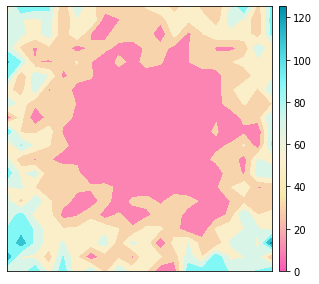

In [84]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 1)
y = np.arange(-10, 10, 1)
z = np.ndarray((20, 20))

# Generate syntheic data
# (x, y) => randomly generate z
for i in range(0, len(x)):
  for j in range(0, len(y)):
    z[i][j] = np.random.rand()*x[i]**2 + np.random.rand()*y[j]**2


fig, ax = plt.subplots(1, 1, figsize = (5, 5))
# remove x and y ticks
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)
ax.set_xticks([])
ax.set_yticks([])
# remove x and y ticks

'''
extent : (x0, x1, y0, y1)\
  It gives the outer pixel boundaries. In this case, the position z[0, 0] 
is the center of the pixel not a corner.
'''
img = ax.imshow(z, cmap = cmp, extent = (0, 2, 0, 2),
                vmin = np.min(z), vmax = np.max(z))

# create axis for colorbar
cbar_ax = make_axes_locatable(ax).append_axes(position = 'right', 
                                              size = 0.1,
                                              pad = 0.1)
cbar = fig.colorbar(mappable = img, cax = cbar_ax)
ax.contourf(z, extent=(0, 2, 0, 2), cmap=cmp, 
            vmin = np.min(z), vmax = np.max(z))
plt.show()

## 一、matplotlib 的 绘图样式
1. 通过全局设置样式而非单独对每张图片设置
2. matplotlib提供了四种批量修改全局样式的方法
  - matplotlib预定义样式
  - 用户自定义stylesheet
  - 设置rcparams
  - 修改matplotlibrc文件

### 1. matplotlib 预定义样式

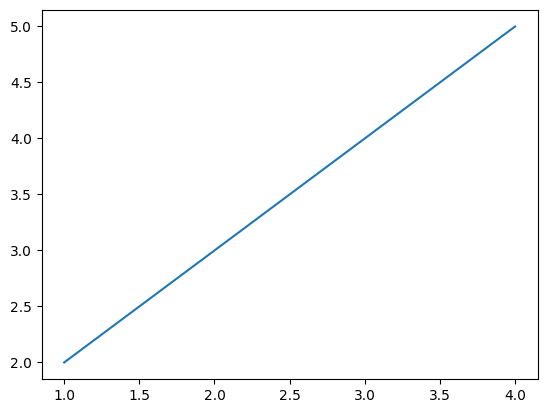

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('default') # default sytle
plt.plot([1,2,3,4],[2,3,4,5])

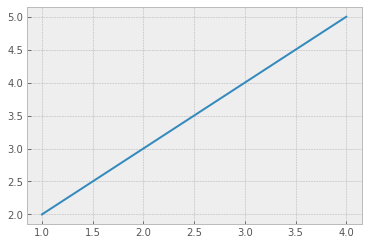

In [ ]:
plt.style.use('ggplot') # ggplot style
plt.plot([1,2,3,4],[2,3,4,5])

In [ ]:
print(plt.style.available) # list 26(all) styles we can use 

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


### 2. 用户自定义stylesheet

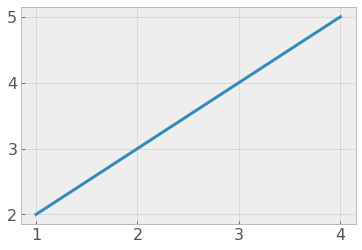

In [ ]:
'''
axes.titlesize : 24
axes.labelsize : 20
lines.linewidth : 3
lines.markersize : 10
xtick.labelsize : 16
ytick.labelsize : 16
'''
plt.style.use('mplstyle')
plt.plot([1,2,3,4],[2,3,4,5])

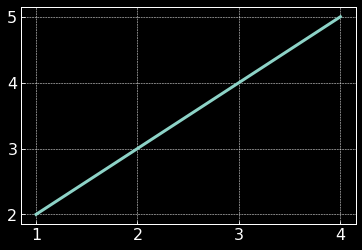

In [ ]:
'''
  If the same stylesheet parameter is involved in several styles, the style
sheet on the right will overwrite the value on the left.
'''
plt.style.use(['dark_background', 'mplstyle'])
plt.plot([1,2,3,4],[2,3,4,5])

### 3.设置rcparams
所有和样式有关的rc设置都保存在一个叫做`matplotlib.rcParams`的变量中

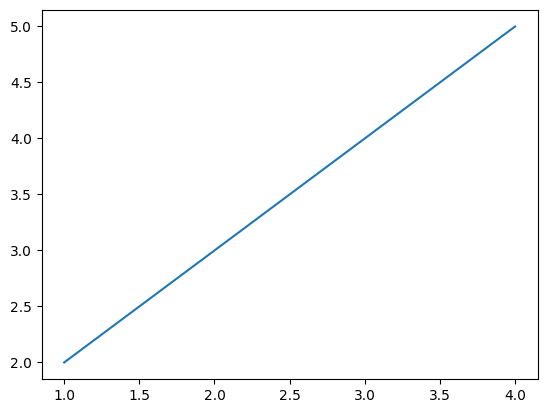

In [ ]:
plt.style.use('default') # default style
plt.plot([1,2,3,4],[2,3,4,5])

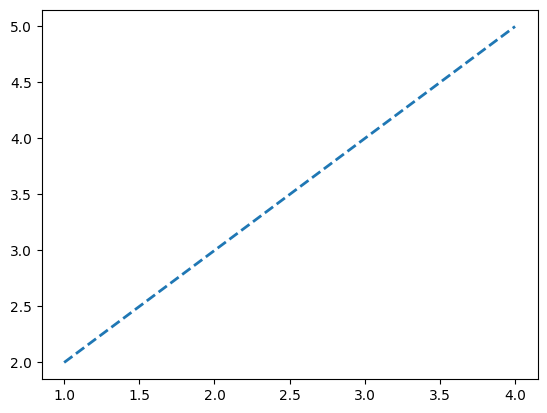

In [ ]:
# Modify the rcParams
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1,2,3,4],[2,3,4,5])

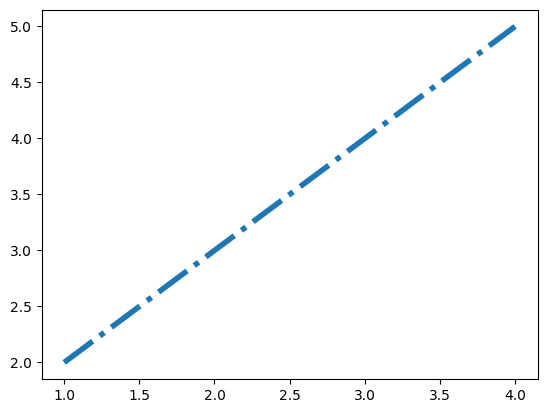

In [ ]:
# Another way to modify the rcParams
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot([1,2,3,4],[2,3,4,5])

### 4.修改matplotlibrc文件
- matplotlib是通过`matplotlibrc`文件来控制样式，所以我们可以通过修改`matplotlibrc`文件来改变样式
- 查找`matplotlibrc`文件的路径

In [ ]:
mpl.matplotlib_fname()

'/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/matplotlibrc'

## 二、matplotlib的色彩设置(color)
- 色彩可分为三个视觉通道
  - 色相
  - 亮度
  - 饱和度

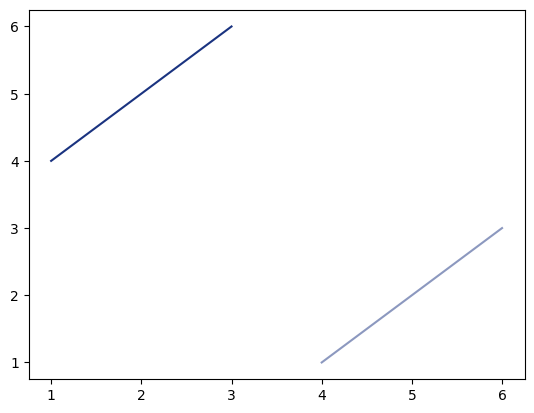

In [ ]:
# RGB & RGBA
plt.style.use('default')
'''
color = (red, green, blue, alpha)
      = (R/255, G/255, B/255, 0~1)
The alpha paramter can be mitted
'''
plt.plot([1,2,3],[4,5,6],color=(0.1, 0.2, 0.5))
plt.plot([4,5,6],[1,2,3],color=(0.1, 0.2, 0.5, 0.5))

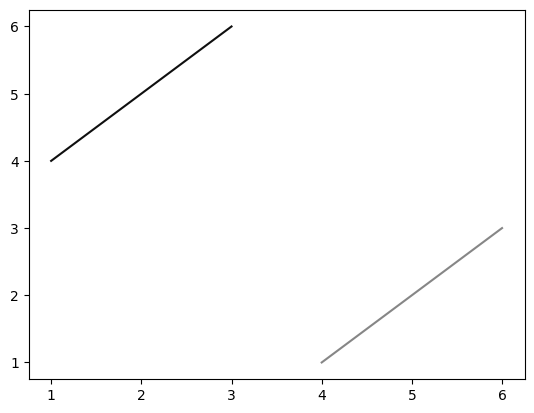

In [ ]:
# HEX RGB & RGBA
# The last two digits represent transparency(alpha) which can be omitted
plt.plot([1,2,3],[4,5,6],color='#0f0f0f')
plt.plot([4,5,6],[1,2,3],color='#0f0f0f80')

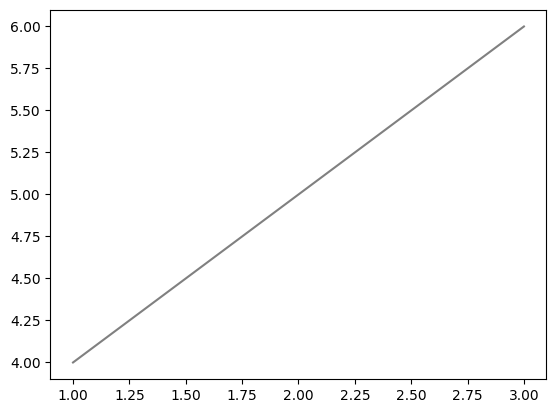

In [ ]:
# Gray Scale [0,1]
# When there is only one value located in [0,1], it means gray scale
# 0(black) => 1(white)
plt.plot([1,2,3],[4,5,6],color='0.5')

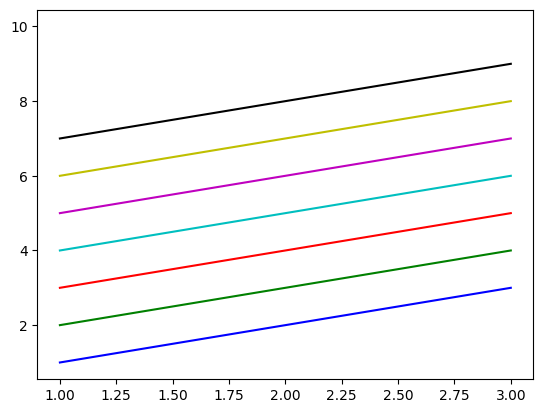

In [ ]:
# Using single character to represent 8 basic colors
'''
'b' = blue, 'g' = green, 'r' = red
'c' = cyan, 'm' = magenta, 'y' = yellow
'k' = black, 'w' = white
'''
cls = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
for i in range(8):
  plt.plot([1,2,3],[1+i,2+i,3+i],color = cls[i])

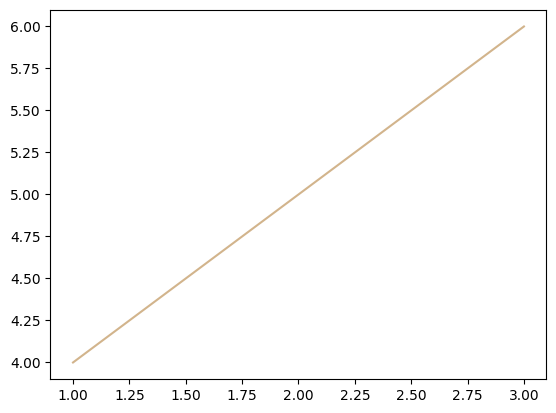

In [ ]:
# Color name
plt.plot([1,2,3],[4,5,6],color='tan')

### 使用`colormap`设置一组颜色
`colormap - cmap`总共有五种类型
- Sequential - 单一色调，渐变（亮度，颜色），表示有顺序的信息
- Diverging - 改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇；当绘制的信息具有关键中间值或者数据偏离零时，是用此值
- Cyclic - 改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇，用于在端点处环绕的值，例如风向，一天中的时间，相角等
- Qualitative - 常常是杂色，用来表示没有排序或关系的信息
- Miscellaneous - 一些在特定场景使用的杂色组合，如彩虹，海洋，地形等

Text(0.5, 1.0, 'c = y, from bottom to top')

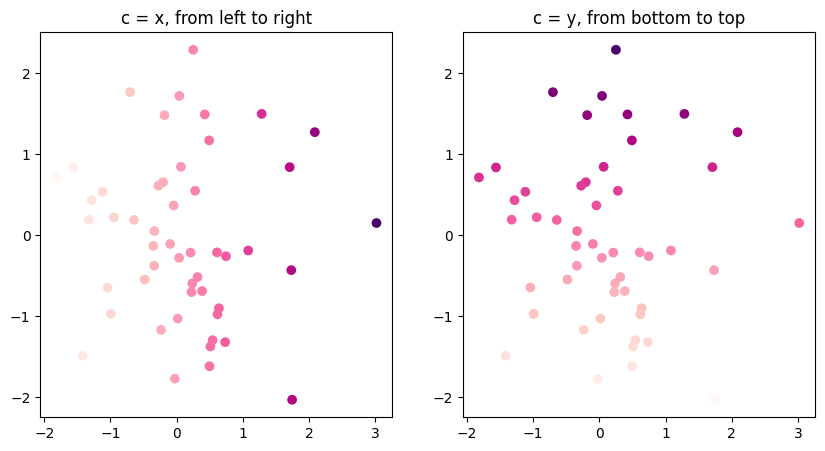

In [ ]:
x = np.random.randn(50)
y = np.random.randn(50)
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
'''
  scatter(x, y, c = ..., cmap = ...)
  The parameter c is assigned to an iterable parameter object.
  The length is the same as x, y , and the (x,y) paramter pair is shown in
different colors depending on the value.
  Simply, just use one of the x and y values to distinguish colors.
'''
axs[0].scatter(x, y, c = x , cmap = 'RdPu')
axs[0].set_title('c = x, from left to right')
axs[1].scatter(x, y, c = y, cmap = 'RdPu')
axs[1].set_title('c = y, from bottom to top')
# plt.scatter(x,y, c = x, cmap = 'RdPu') # RdPu from Sequential colormaps